In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from collections import Counter
import nltk
import string
from nltk.corpus import stopwords 
from scipy.sparse import lil_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('okcupid_profiles.csv') #marks df
# df = pd.read_csv("../profiles.csv") #liz's df
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [3]:
# df = df[df['essay0'].notna()]
df[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']] = df[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].fillna('')

In [4]:
df['essay0_length'] = df['essay0'].apply(lambda x: len(x.split(' ')))

In [5]:
df['essay_combined'] = df['essay0'] + df['essay1'] + df['essay2'] + df['essay3'] + df['essay4'] + df['essay5'] + df['essay6'] + df['essay7'] + df['essay8'] + df['essay9']

In [6]:
df['essay_combined'][0]

"about me:  i would love to think that i was some some kind of intellectual: either the dumbest smart guy, or the smartest dumb guy. can't say i can tell the difference. i love to talk about ideas and concepts. i forge odd metaphors instead of reciting cliches. like the simularities between a friend of mine's house and an underwater salt mine. my favorite word is salt by the way (weird choice i know). to me most things in life are better as metaphors. i seek to make myself a little better everyday, in some productively lazy way. got tired of tying my shoes. considered hiring a five year old, but would probably have to tie both of our shoes... decided to only wear leather shoes dress shoes.  about you:  you love to have really serious, really deep conversations about really silly stuff. you have to be willing to snap me out of a light hearted rant with a kiss. you don't have to be funny, but you have to be able to make me laugh. you should be able to bend spoons with your mind, and tele

In [7]:
df[df['essay_combined'].isna()]

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,essay0_length,essay_combined


In [8]:
df.shape

(59946, 33)

In [9]:
len(list(df.columns))

33

In [10]:
df.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'essay0_length',
       'essay_combined'],
      dtype='object')

In [11]:
total_count = df.isna().count()
count_na =df.isna().sum().sort_values(ascending = False)
pct_na =(df.isna().sum()/total_count).sort_values(ascending = False)
pd.options.display.float_format = '{:.1%}'.format
missing_data = pd.concat([count_na, pct_na], axis=1, keys=['Count', 'Percent'])
# Only show columns with more than 5% missing data
missing_data[missing_data['Percent']>=0.05].head(20)

,Count,Percent
offspring,35561,59.3%
diet,24395,40.7%
religion,20226,33.7%
pets,19921,33.2%
drugs,14080,23.5%
sign,11056,18.4%
job,8198,13.7%
education,6628,11.1%
ethnicity,5680,9.5%
smokes,5512,9.2%


In [12]:
male_df = df[df['sex'] == 'm']
print('m: ', male_df.shape)
female_df = df[df['sex'] == 'f']
print('f: ', female_df.shape)

m:  (35829, 33)
f:  (24117, 33)


In [13]:
df.describe()


,age,height,income,essay0_length
count,5994600.0%,5994300.0%,5994600.0%,5994600.0%
mean,3234.0%,6829.5%,2003322.3%,10705.0%
std,945.3%,399.5%,9734619.2%,12064.4%
min,1800.0%,100.0%,-100.0%,100.0%
25%,2600.0%,6600.0%,-100.0%,2900.0%
50%,3000.0%,6800.0%,-100.0%,7500.0%
75%,3700.0%,7100.0%,-100.0%,14600.0%
max,11000.0%,9500.0%,100000000.0%,556900.0%


In [14]:
male_df.describe()

,age,height,income,essay0_length
count,3582900.0%,3582700.0%,3582900.0%,3582900.0%
mean,3201.9%,7044.3%,2599130.8%,10393.2%
std,903.3%,307.7%,10984524.9%,12325.7%
min,1800.0%,100.0%,-100.0%,100.0%
25%,2600.0%,6800.0%,-100.0%,2700.0%
50%,3000.0%,7000.0%,-100.0%,7100.0%
75%,3600.0%,7200.0%,-100.0%,14000.0%
max,10900.0%,9500.0%,100000000.0%,556900.0%


In [15]:
female_df.describe()

,age,height,income,essay0_length
count,2411700.0%,2411600.0%,2411700.0%,2411700.0%
mean,3281.8%,6510.4%,1118169.7%,11168.2%
std,1002.5%,292.7%,7414977.9%,11650.1%
min,1800.0%,400.0%,-100.0%,100.0%
25%,2600.0%,6300.0%,-100.0%,3200.0%
50%,3000.0%,6500.0%,-100.0%,8100.0%
75%,3700.0%,6700.0%,-100.0%,15500.0%
max,11000.0%,9500.0%,100000000.0%,167000.0%


In [16]:

punct = string.punctuation
stop_words = stopwords.words('english')
totalWords = 0

In [33]:
temp_m = [x[0] for x in wordCount_m.most_common(100)]

NameError: name 'wordCount_m' is not defined

In [ ]:
temp_f = [x[0] for x in wordCount_f.most_common(100)]

In [ ]:
# [x for x in temp_m if x in temp_f]

In [17]:
to_add = ['im',
 'like',
 'love',
 'good',
 'music',
 'people',
 'food',
 'time',
 'things',
 'life',
 'friends',
 'new',
 'also',
 'really',
 'dont',
 'movies',
 'work',
 'get',
 'ive',
 'one',
 'enjoy',
 'much',
 'anything',
 'know',
 'family',
 'books',
 'lot',
 'pretty',
 'think',
 'always',
 'go',
 'make',
 'would',
 'going',
 'working',
 'fun',
 'great',
 'favorite',
 'years',
 'well',
 'looking',
 'want',
 'world',
 'making',
 'read',
 'many',
 'trying',
 'something',
 'someone',
 'find',
 'back',
 'way',
 'around',
 'say',
 'try',
 'big',
 'live',
 'day',
 'see',
 'person',
 'ill',
 'little',
 'right',
 'take',
 'home',
 'city',
 'movie',
 'school',
 'long',
 'reading',
 'tv',
 'stuff',
 'never',
 'youre',
 'feel',
 'even',
 'rock',
 'shows',
 'everything',
 'still',
 'thing',
 'meet',
 'best',
 'thats',
 'getting',
 'better',
 'play',
 'sometimes',
 'could',
 'san',
 '2',
 'laugh',
 'first',
 'though',
 'open',
 'bay',
 'probably',
 'playing',
 'next',
 'watching',
 'art',
 'every',
 'old',
 'kind',
 'usually',
 '3',
 'night',
 'travel',
 'need',
 'job',
 'man',
 'sense',
 'book',
 'hard',
 'show',
 'eat',
 'living',
 'watch',
 'id',
 'mind',
 'cant',
 'area',
 '5',
 'cooking',
 'last',
 'two',
 'year',
 'bit',
 'humor',
 'sf',
 'without',
 'others',
 'recently',
 'currently',
 'spend']

stop_words.extend(to_add)

In [18]:
essay0_f = female_df['essay0'].to_dict()
essay0_m = male_df['essay0'].to_dict()
essay_combined_f = female_df['essay_combined'].to_dict()
essay_combined_m = male_df['essay_combined'].to_dict()

In [22]:
X = df.drop('sex', axis=1).to_dict('records')
y = df['sex'].to_dict()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)

In [43]:
### baseline model, see if guy or girl is mentioned more often ####
def baseline_predict(datum):
    text = datum['essay_combined']
    words = text.lower().split(' ')
    
    guy_count = 0
    girl_count = 0
    for word in words:
        if word == 'guy' or word == 'games':
            guy_count += 1
        if word == 'girl' or word == 'dancing':
            girl_count += 1
    
    if guy_count > girl_count:
        return 'm'
    elif guy_count < girl_count:
        return 'f'
    else:
        return np.random.choice(['m','f'], p=[0.5,0.5])

In [44]:
baseline_pred = []
for d in X_test:
    baseline_pred.append(baseline_predict(d))

In [45]:
accuracy_score(baseline_pred, y_test)

0.552039629985341

In [46]:
essay_combined_total = df['essay_combined'].to_dict()
wordCount_total = Counter()
for k, v in essay_combined_total.items():
    t = v.lower()
    t = [c for c in t if not (c in punct)]
    t = ''.join(t)
    words = t.strip().split()
    for w in words:
        if w not in stop_words:
            wordCount_total[w] += 1

In [47]:
words = wordCount_total.most_common(1000)
words = [x[0] for x in words]
wordId = dict(zip(words, range(len(words))))

In [48]:
def feature(datum):
    feat = [0]*len(words)
    r = ''.join([c for c in datum['essay_combined'].lower() if not c in punct])
    r =  r.replace("<br />", "") # data cleaning of break/new line characters
    r =  r.replace("\n", "")
    for w in r.split():
        if w in words:
            feat[wordId[w]] += 1
    feat.append(1) #offset
    return feat

In [49]:
X_train = lil_matrix([feature(d) for d in X_train])
# y_train = y_train

In [50]:
X_test = lil_matrix([feature(d) for d in X_test])
# y_test = y_test

In [51]:
mod = linear_model.LogisticRegression(C=10000)
mod.fit(X_train, y_train)

pred = mod.predict(X_test)
accuracy_score(pred, y_test)

0.7409391902138199

# start of liz's code - trying new models

In [66]:
#sum(pred == y_test)

In [98]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Female', 'Predicted Male'],
    index=['True Female', 'True Male']
)

,Predicted Female,Predicted Male
True Female,4549,3403
True Male,1885,9946


In [99]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.6006166910984179

In [100]:
pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Female', 'Predicted Male'],
    index=['True Female', 'True Male']
)

,Predicted Female,Predicted Male
True Female,3963,3989
True Male,3912,7919


In [101]:
from sklearn.ensemble import GradientBoostingClassifier
xgboost = GradientBoostingClassifier()
xgboost.fit(X_train, y_train)
pred = xgboost.predict(X_test)
accuracy_score(pred, y_test)

0.6909467724814234

In [102]:
pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Female', 'Predicted Male'],
    index=['True Female', 'True Male']
)
#if we can figure out how to lower predicted male/true female this model would be p good

,Predicted Female,Predicted Male
True Female,3320,4632
True Male,1482,10349


In [103]:
# from sklearn.naive_bayes import CategoricalNB

# clf = CategoricalNB()
# clf.fit(X_train, y_train)
# pred = clf.predict(X_test)
# accuracy_score(pred, y_test)

In [310]:
wordCount_f = Counter()
for k, v in essay_combined_f.items():
    t = v.lower()
    t = [c for c in t if not (c in punct)]
    t = ''.join(t)
    words = t.strip().split()
    for w in words:
        if w not in stop_words:
            wordCount_f[w] += 1

In [311]:
wordCount_f

Counter({'easy': 3002,
         'beauty': 1853,
         'ugly': 237,
         'perspective': 432,
         'makes': 3936,
         'gratifying': 30,
         'gift': 347,
         'playdigging': 1,
         'buried': 54,
         'treasurefrolicking': 1,
         'witty': 1193,
         'banter': 390,
         'using': 889,
         'camera': 880,
         'extract': 13,
         'sums': 113,
         'whole': 1859,
         'share': 3327,
         'hopes': 199,
         'opening': 422,
         'amused': 160,
         'missi': 5,
         'unicorni': 1,
         'ones': 2390,
         'pictures': 957,
         'collect': 182,
         'sit': 687,
         'neatly': 28,
         'bookshelves': 33,
         'especially': 4739,
         'brownies': 71,
         'unless': 1174,
         'country': 3511,
         'foodlaughter': 8,
         'amazing': 3704,
         'color': 1054,
         'curiosity': 524,
         'rhythm': 159,
         'pair': 486,
         'sunglassessynchronicity': 

In [312]:
wordCount_m = Counter()
for k, v in essay_combined_m.items():
    t = v.lower()
    t = [c for c in t if not (c in punct)]
    t = ''.join(t)
    words = t.strip().split()
    for w in words:
        if w not in stop_words:
            wordCount_m[w] += 1

In [313]:
wordCount_m

Counter({'intellectual': 1290,
         'either': 3801,
         'dumbest': 19,
         'smart': 3193,
         'guy': 11451,
         'smartest': 65,
         'dumb': 731,
         'tell': 6442,
         'difference': 791,
         'talk': 6706,
         'ideas': 2442,
         'concepts': 197,
         'forge': 31,
         'odd': 817,
         'metaphors': 83,
         'instead': 1335,
         'reciting': 51,
         'cliches': 55,
         'simularities': 1,
         'friend': 5377,
         'mines': 38,
         'house': 5934,
         'underwater': 99,
         'salt': 354,
         'mine': 1517,
         'word': 1816,
         'weird': 2269,
         'choice': 796,
         'seek': 634,
         'everyday': 1304,
         'productively': 8,
         'lazy': 804,
         'got': 7225,
         'tired': 714,
         'tying': 102,
         'shoes': 1490,
         'considered': 454,
         'hiring': 33,
         'five': 1642,
         'tie': 342,
         'decided': 1367,
    

In [314]:
from wordcloud import WordCloud, ImageColorGenerator

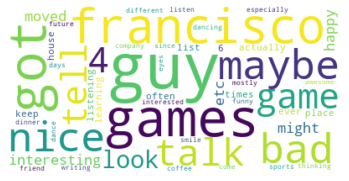

In [315]:
freqs = wordCount_m

wordcloud = WordCloud(max_font_size=75, max_words=50, background_color="white")
wordcloud.generate_from_frequencies(frequencies=freqs)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

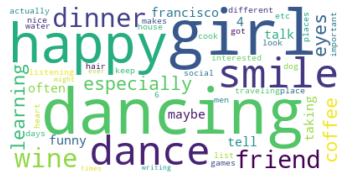

In [316]:
freqs = wordCount_f

wordcloud = WordCloud(max_font_size=75, max_words=50, background_color="white")
wordcloud.generate_from_frequencies(frequencies=wordCount_f)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()